In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from datetime import date, timedelta
import seaborn as sns

In [3]:
#Importing csv files

first_read = pd.read_csv("dilan_first_read.csv", delimiter=";", names=["date_time", "event_type", "country", "user_id", "source", "topic"])
returning_read = pd.read_csv("dilan_returning_read.csv", delimiter=";", names=["date_time", "event_type", "country", "user_id", "topic"])
subscribe = pd.read_csv("dilan_subscribe.csv", delimiter=";", names=["date_time", "event_type", "user_id"])
buy = pd.read_csv("dilan_buy.csv", delimiter=";", names=["date_time", "event_type", "user_id", "price"])

In [4]:
frames = [first_read, returning_read]
concat_read = pd.concat(frames)
#concat_read

In [5]:
concat_read['date'] = concat_read['date_time'].str.split(' ').str[0]
concat_read

,date_time,event_type,country,user_id,source,topic,date
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America,2018-01-01
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America,2018-01-01
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa,2018-01-01
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe,2018-01-01
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America,2018-01-01
...,...,...,...,...,...,...,...
371849,2018-03-31 04:34:32,read,country_4,2458361163,NaN,Africa,2018-03-31
371850,2018-03-31 05:02:06,read,country_6,2458361177,NaN,Asia,2018-03-31
371851,2018-03-31 05:02:14,read,country_7,2458361244,NaN,North America,2018-03-31
371852,2018-03-31 05:03:53,read,country_7,2458361267,NaN,Europe,2018-03-31


In [6]:
concat_read.groupby('country').count()[['user_id']].sort_values('user_id', ascending=False)

,user_id
country,
country_5,149732
country_7,132067
country_2,130076
country_4,71258
country_6,63752
country_8,19633
country_3,9128
country_1,6231


In [7]:
#new and returning readers per day
grouped_concat = concat_read.groupby('date').count()[['user_id']].reset_index()
#grouped_concat

<AxesSubplot:>

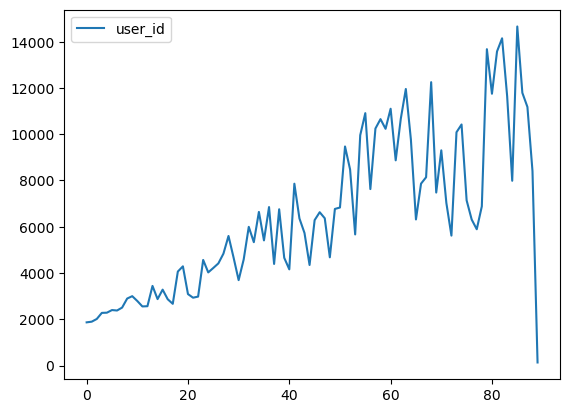

In [8]:
grouped_concat.plot()

<AxesSubplot:>

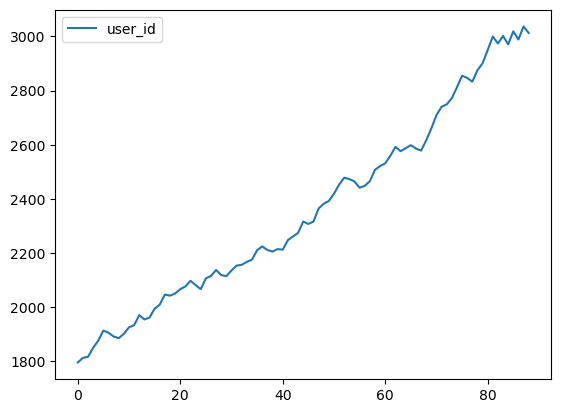

In [9]:
#new readers per day
first_read['date'] = first_read['date_time'].str.split(' ').str[0]
grouped_first = first_read.groupby('date').count()[['user_id']].reset_index()
grouped_first.plot()

<AxesSubplot:>

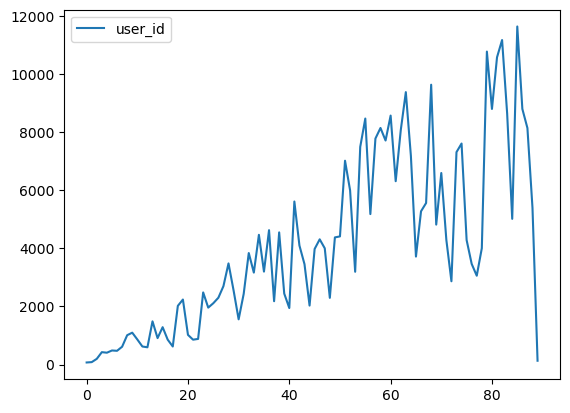

In [10]:
#returning readers per day
returning_read['date'] = returning_read['date_time'].str.split(' ').str[0]
grouped_returning = returning_read.groupby('date').count()[['user_id']].reset_index()
grouped_returning.plot()

In [11]:
merged_buy = first_read.merge(buy, how='left', on='user_id')[['date', 'user_id', 'country', 'source', 'topic', 'price']]
#merged_buy

In [12]:
#revenue per day
revenue_per_day = merged_buy.groupby('date').sum('price').reset_index()[['date', 'price']]
revenue_per_day.tail(10)

,date,price
79,2018-03-21,3192.0
80,2018-03-22,1744.0
81,2018-03-23,1904.0
82,2018-03-24,992.0
83,2018-03-25,504.0
84,2018-03-26,0.0
85,2018-03-27,0.0
86,2018-03-28,0.0
87,2018-03-29,0.0
88,2018-03-30,0.0


<AxesSubplot:>

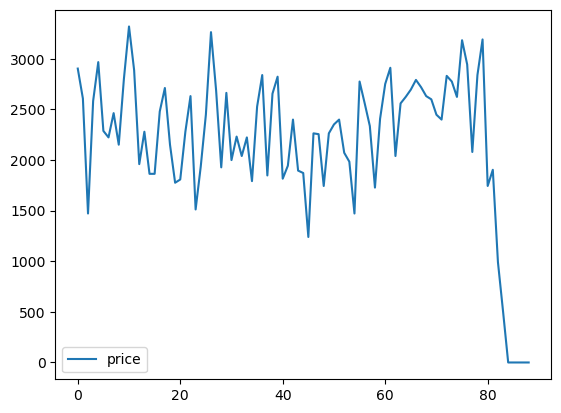

In [13]:
revenue_per_day.plot()

<AxesSubplot:>

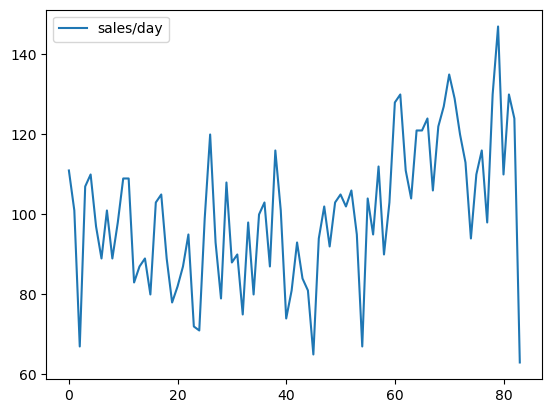

In [14]:
#number of sales per day
sales_per_day = merged_buy.groupby('date').count().iloc[0:84].reset_index()[['date', 'price']]
sales_per_day = sales_per_day.rename(columns = {'price': 'sales/day'})
sales_per_day.plot()

<AxesSubplot:>

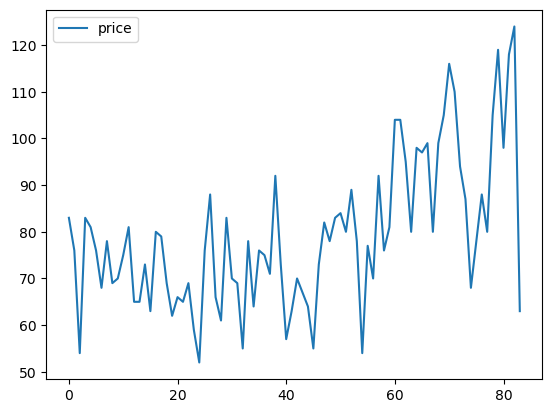

In [15]:
ebook_per_day = merged_buy[merged_buy.price == 8].groupby('date').count().reset_index()[['date', 'price']]
ebook_per_day.plot()

In [16]:
#number of ebooks sold
ebook_per_day.sum()['price']

6640

In [17]:
#income from ebooks sold
ebook_per_day.sum()['price'] * 8

53120

<AxesSubplot:>

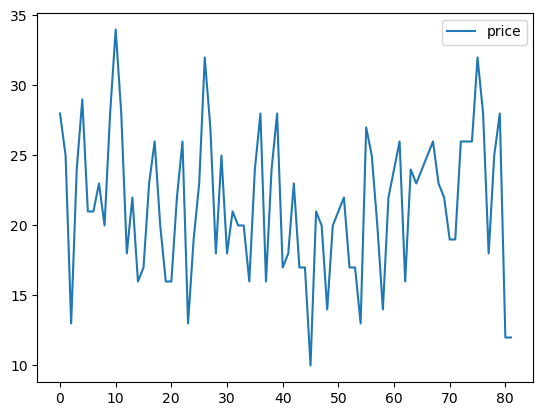

In [18]:
video_course_per_day = merged_buy[merged_buy.price == 80].groupby('date').count().reset_index()[['date', 'price']]
video_course_per_day.plot()

In [19]:
#number of video courses sold
video_course_per_day.sum()['price']

1767

In [20]:
#income from video courses sold
video_course_per_day.sum()['price'] * 80

141360

In [21]:
#total revenue
merged_buy['price'].sum()

194480.0

In [22]:
merged_subscribe = first_read.merge(subscribe, how='left', on='user_id')
merged_subscribe.head()

,date_time_x,event_type_x,country,user_id,source,topic,date,date_time_y,event_type_y
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America,2018-01-01,NaN,NaN
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America,2018-01-01,NaN,NaN
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa,2018-01-01,NaN,NaN
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe,2018-01-01,NaN,NaN
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America,2018-01-01,NaN,NaN


In [23]:
#subscriber per day
subscribe_per_day = merged_subscribe.groupby('date').count()[['event_type_y']].reset_index()
subscribe_per_day = subscribe_per_day.rename(columns = {'event_type_y': 'subscriber/day'})
subscribe_per_day.head()

,date,subscriber/day
0,2018-01-01,281
1,2018-01-02,236
2,2018-01-03,170
3,2018-01-04,144
4,2018-01-05,123


<AxesSubplot:>

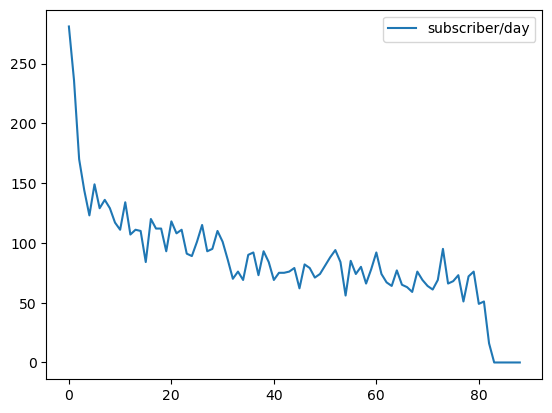

In [24]:
subscribe_per_day.plot()

In [25]:
#revenue per day / all revenue
revenue_per_day['ratio'] = revenue_per_day['price'] / revenue_per_day['price'].sum()
revenue_per_day_ratio = revenue_per_day[['date', 'ratio']]

In [26]:
#subscriber per day / all subscriber
subscribe_per_day['ratio'] = subscribe_per_day['subscriber/day'] / subscribe_per_day['subscriber/day'].sum()
subscribe_per_day_ratio = subscribe_per_day[['date', 'ratio']]

<AxesSubplot:>

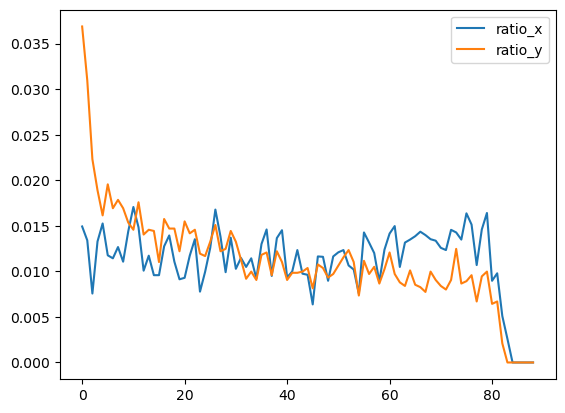

In [27]:
#plot of revenue per day ratio and subscriber per day ratio on one graph
revenue_per_day_ratio.merge(subscribe_per_day_ratio, on="date").plot()

In [28]:
#how many times returning readers return
returning_read_grouped = returning_read.groupby('user_id').count().sort_values('event_type')[['event_type']].reset_index()
#returning_read_grouped.groupby('event_type').count()
returning_read_grouped

,user_id,event_type
0,2458151267,1
1,2458249927,1
2,2458249904,1
3,2458249899,1
4,2458249869,1
...,...,...
66226,2458280511,51
66227,2458203397,51
66228,2458284001,51
66229,2458197594,51


In [30]:
all_grouped = returning_read_grouped.merge(subscribe, how='outer', on='user_id').merge(buy, how='outer', on='user_id')
all_grouped = all_grouped.groupby('event_type_x').count()[['user_id', 'event_type_y', 'price']].reset_index()
all_grouped.rename(columns = {'event_type_x': 'number_of_times', 'user_id': 'number_of_users_returned_to_read', 'event_type_y': 'number_of_subscribes', 'price': 'number_of_buys'})
#the more times a reader returns, the more likely they are to subscribe and buy

,number_of_times,number_of_users_returned_to_read,number_of_subscribes,number_of_buys
0,1.0,12491,22,0
1,2.0,8923,20,0
2,3.0,8227,37,3
3,4.0,6089,63,4
4,5.0,5861,80,0
5,6.0,4298,123,3
6,7.0,3421,137,11
7,8.0,2964,207,33
8,9.0,2527,231,119
9,10.0,1982,285,202


# Cohort Analysis

In [31]:
dilan_reads = {}
with open("dilan_cohort.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    for row in csv_reader:
        if row[1] not in dilan_reads:
            dilan_reads[row[1]] = []
        if row[0] not in dilan_reads[row[1]]:
            dilan_reads[row[1]].append(row[0])

In [32]:
dilan_reads_list = list(dilan_reads.values())
#dilan_reads_list

In [33]:
start_dt = date(2018, 1, 1)
end_dt = date(2018, 3, 31)

delta = timedelta(days=1)
date_list = []

while start_dt <= end_dt:
    date_list.append(start_dt.isoformat())
    start_dt += delta

#print(date_list)

In [34]:
print("cohort;days_passed;number_of_users")
cohort_data = []
for cohort in date_list:
    day_passed = 0
    for given_date in date_list[date_list.index(cohort):date_list.index(cohort)+8]:
        number_of_users = 0
        for users in dilan_reads_list:
            if given_date in users and users[0] == cohort:
                number_of_users += 1
        inner_list = [cohort, str(day_passed), str(number_of_users)]
        cohort_data.append(inner_list)
        print(cohort + ";" + str(day_passed) + ";" + str(number_of_users))
        day_passed += 1

cohort;days_passed;number_of_users
2018-01-01;0;1795
2018-01-01;1;37
2018-01-01;2;28
2018-01-01;3;35
2018-01-01;4;26
2018-01-01;5;25
2018-01-01;6;17
2018-01-01;7;23
2018-01-02;0;1812
2018-01-02;1;42
2018-01-02;2;51
2018-01-02;3;42
2018-01-02;4;38
2018-01-02;5;29
2018-01-02;6;34
2018-01-02;7;39
2018-01-03;0;1816
2018-01-03;1;52
2018-01-03;2;43
2018-01-03;3;36
2018-01-03;4;23
2018-01-03;5;28
2018-01-03;6;34
2018-01-03;7;20
2018-01-04;0;1849
2018-01-04;1;56
2018-01-04;2;42
2018-01-04;3;31
2018-01-04;4;34
2018-01-04;5;42
2018-01-04;6;38
2018-01-04;7;41
2018-01-05;0;1876
2018-01-05;1;48
2018-01-05;2;34
2018-01-05;3;34
2018-01-05;4;30
2018-01-05;5;29
2018-01-05;6;27
2018-01-05;7;28
2018-01-06;0;1913
2018-01-06;1;68
2018-01-06;2;50
2018-01-06;3;53
2018-01-06;4;35
2018-01-06;5;26
2018-01-06;6;19
2018-01-06;7;17
2018-01-07;0;1905
2018-01-07;1;67
2018-01-07;2;61
2018-01-07;3;49
2018-01-07;4;40
2018-01-07;5;32
2018-01-07;6;24
2018-01-07;7;26
2018-01-08;0;1891
2018-01-08;1;91
2018-01-08;2;65
2018-

In [35]:
cohort_df = pd.DataFrame(cohort_data, columns=['cohort', 'day_passed', 'number_of_users'])
cohort_df = cohort_df[cohort_df['day_passed'] != '0']
cohort_df['number_of_users'] = cohort_df['number_of_users'].astype(str).astype(int)
cohort_df

,cohort,day_passed,number_of_users
1,2018-01-01,1,37
2,2018-01-01,2,28
3,2018-01-01,3,35
4,2018-01-01,4,26
5,2018-01-01,5,25
...,...,...,...
684,2018-03-28,2,470
685,2018-03-28,3,0
687,2018-03-29,1,715
688,2018-03-29,2,0


In [36]:
cohort = cohort_df.groupby(['cohort', 'day_passed'])['number_of_users'].sum()
cohort = cohort.unstack()
cohort = cohort.fillna(0)
cohort.head(10)

day_passed,1,2,3,4,5,6,7
cohort,,,,,,,
2018-01-01,37.0,28.0,35.0,26.0,25.0,17.0,23.0
2018-01-02,42.0,51.0,42.0,38.0,29.0,34.0,39.0
2018-01-03,52.0,43.0,36.0,23.0,28.0,34.0,20.0
2018-01-04,56.0,42.0,31.0,34.0,42.0,38.0,41.0
2018-01-05,48.0,34.0,34.0,30.0,29.0,27.0,28.0
2018-01-06,68.0,50.0,53.0,35.0,26.0,19.0,17.0
2018-01-07,67.0,61.0,49.0,40.0,32.0,24.0,26.0
2018-01-08,91.0,65.0,55.0,44.0,34.0,34.0,32.0
2018-01-09,89.0,48.0,39.0,28.0,36.0,28.0,17.0


<AxesSubplot:xlabel='day_passed', ylabel='cohort'>

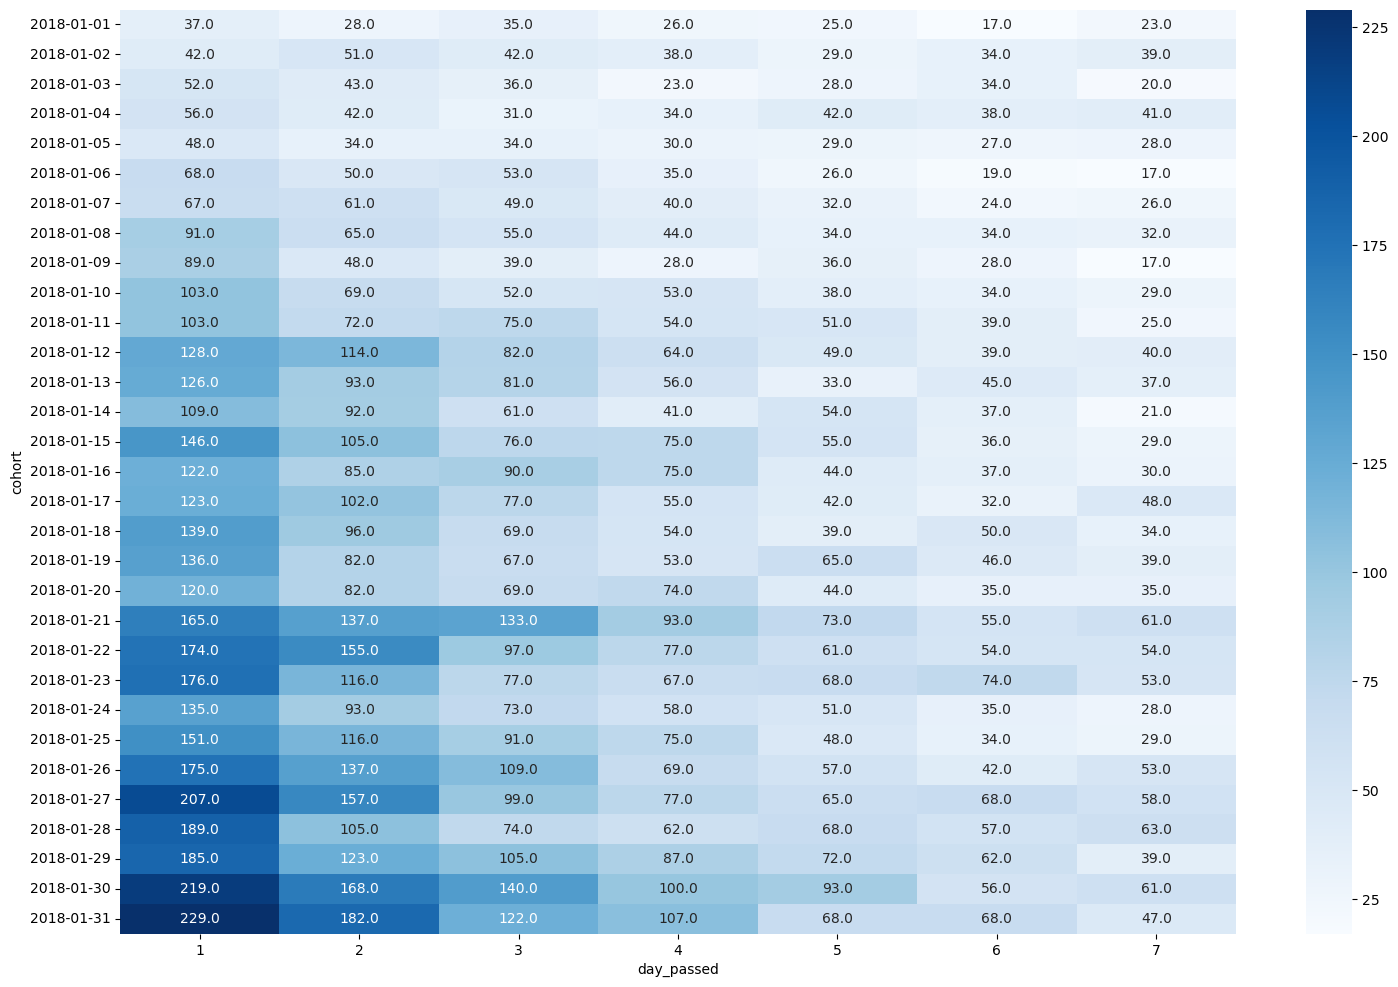

In [37]:
plt.figure(figsize=(18,12))
sns.heatmap(cohort.iloc[:31,:8], annot=True, cmap='Blues', fmt=".1f")

<AxesSubplot:xlabel='day_passed', ylabel='cohort'>

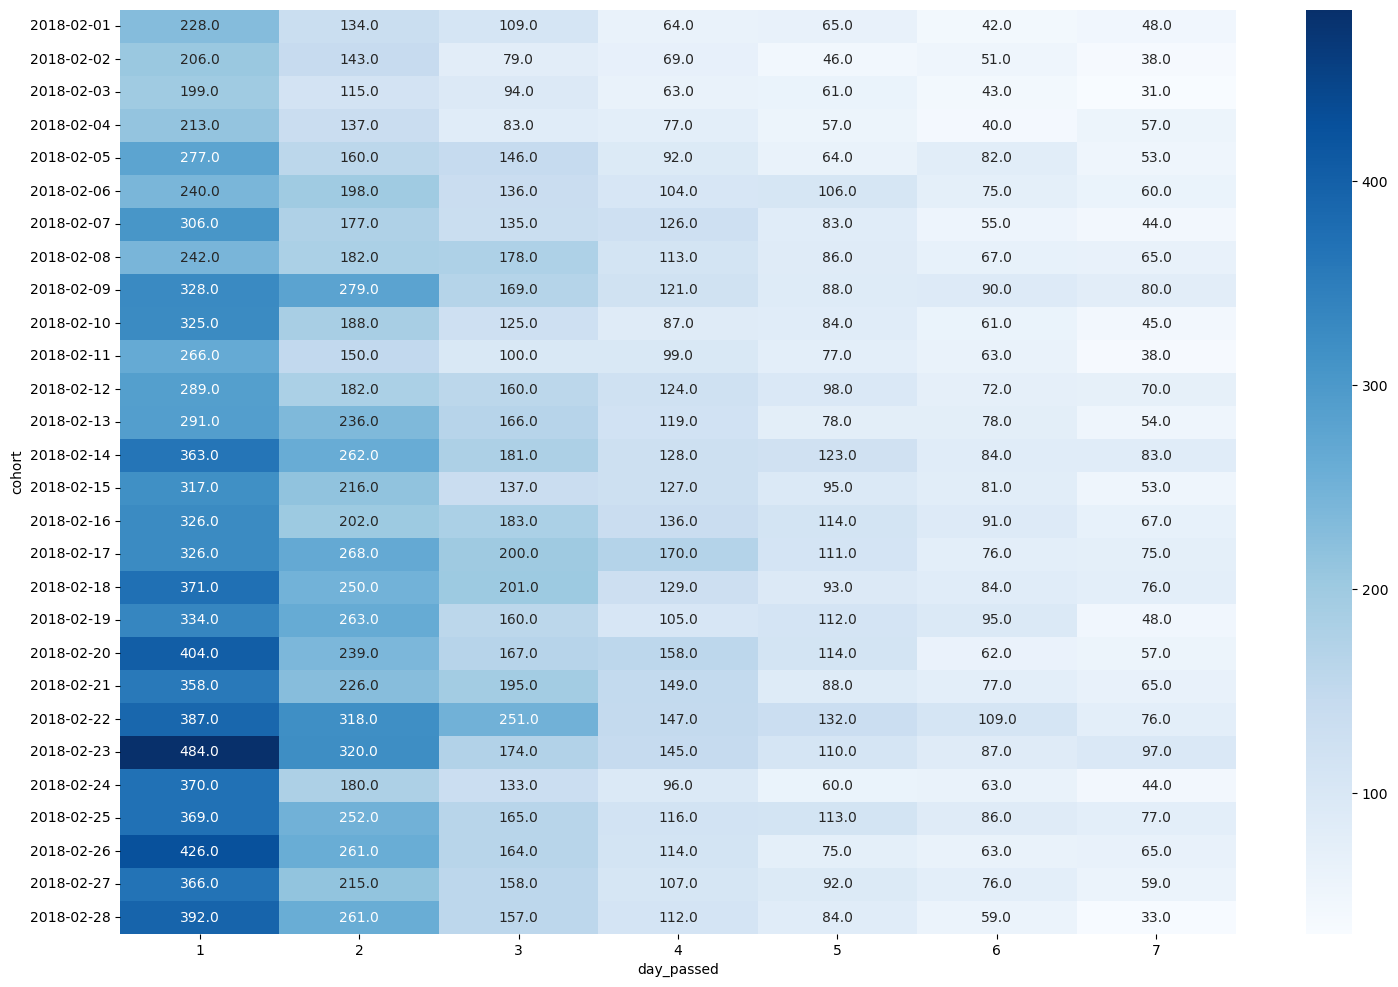

In [38]:
plt.figure(figsize=(18,12))
sns.heatmap(cohort.iloc[31:59,:8], annot=True, cmap='Blues', fmt=".1f")

<AxesSubplot:xlabel='day_passed', ylabel='cohort'>

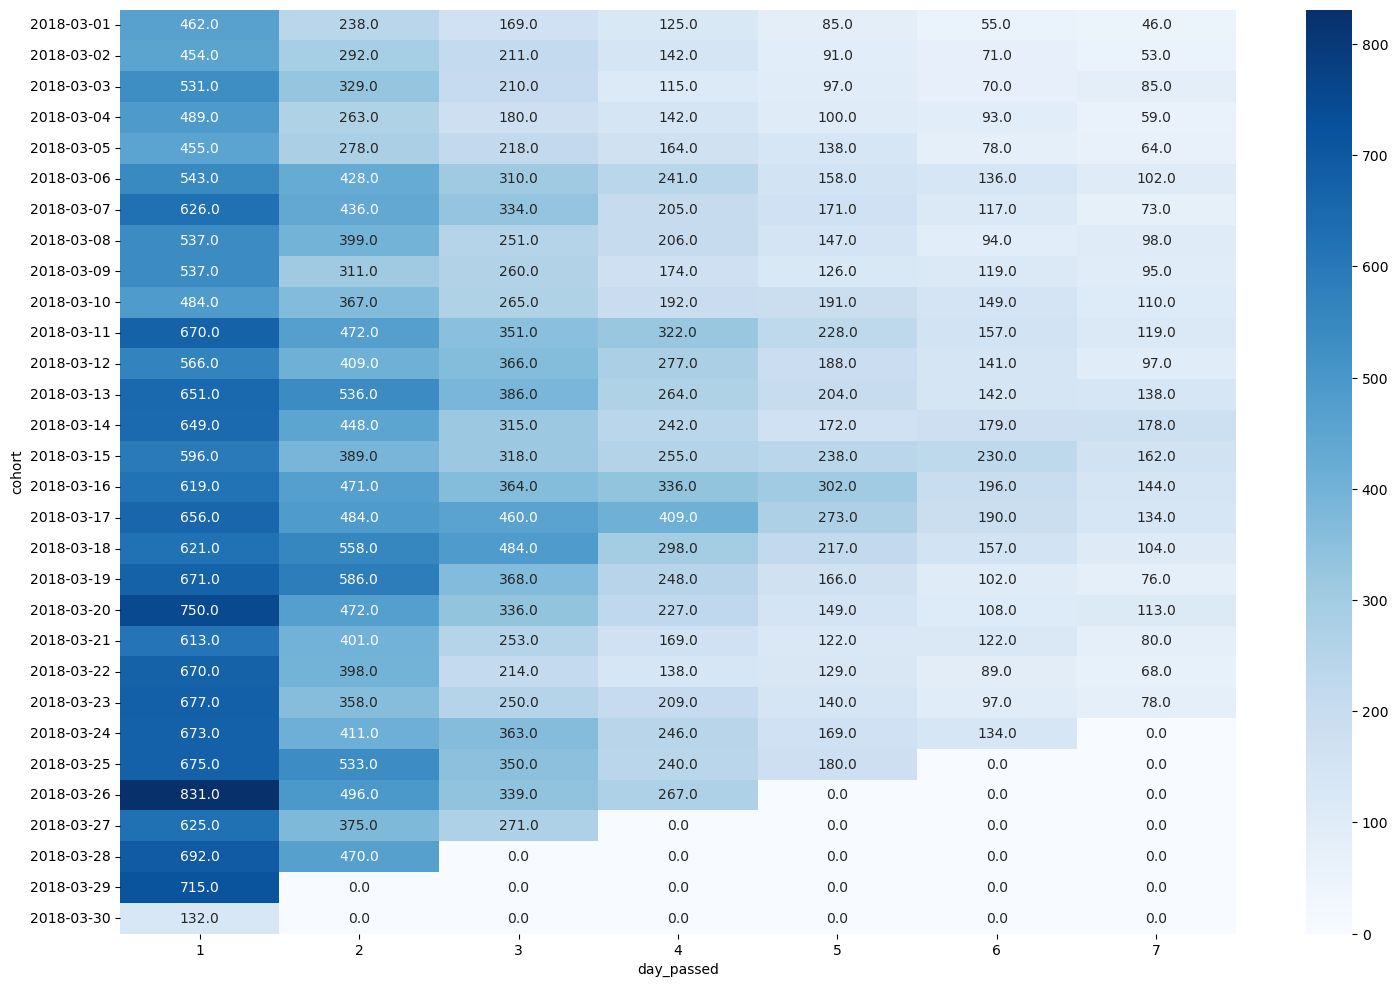

In [39]:
plt.figure(figsize=(18,12))
sns.heatmap(cohort.iloc[59:91,:8], annot=True, cmap='Blues', fmt=".1f")

In [40]:
num_1 = cohort.iloc[:7,:8].sum()
num_2 = cohort.iloc[7:14,:8].sum()
num_3 = cohort.iloc[14:21,:8].sum()
num_4 = cohort.iloc[21:28,:8].sum()
num_5 = cohort.iloc[28:35,:8].sum()
num_6 = cohort.iloc[35:42,:8].sum()
num_7 = cohort.iloc[42:49,:8].sum()
num_8 = cohort.iloc[49:56,:8].sum()
num_9 = cohort.iloc[56:63,:8].sum()
num_10 = cohort.iloc[63:70,:8].sum()
num_11 = cohort.iloc[70:77,:8].sum()
#num_12 = cohort.iloc[77:84,:8].sum()
#missing data for num_12

In [41]:
index_list = ['1. week', '2. week', '3. week', '4. week', '5. week', '6. week', '7. week', '8. week', '9. week', '10. week', '11. week']

In [42]:
df = pd.concat([num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11], axis=1)
df = df.transpose()
df

day_passed,1,2,3,4,5,6,7
0,370.0,309.0,280.0,226.0,211.0,193.0,194.0
1,749.0,553.0,445.0,340.0,295.0,256.0,201.0
2,951.0,689.0,581.0,479.0,362.0,291.0,276.0
3,1207.0,879.0,620.0,485.0,418.0,364.0,338.0
4,1479.0,1002.0,732.0,567.0,462.0,362.0,321.0
5,1984.0,1334.0,989.0,742.0,588.0,493.0,385.0
6,2283.0,1616.0,1228.0,933.0,712.0,566.0,478.0
7,2706.0,1798.0,1245.0,916.0,729.0,579.0,464.0
8,3120.0,1859.0,1249.0,857.0,624.0,487.0,400.0
9,3852.0,2691.0,1989.0,1504.0,1159.0,850.0,661.0


In [43]:
df.index = index_list

<AxesSubplot:title={'center':'Cohort Analysis by Number of Readers / Week'}, xlabel='day_passed'>

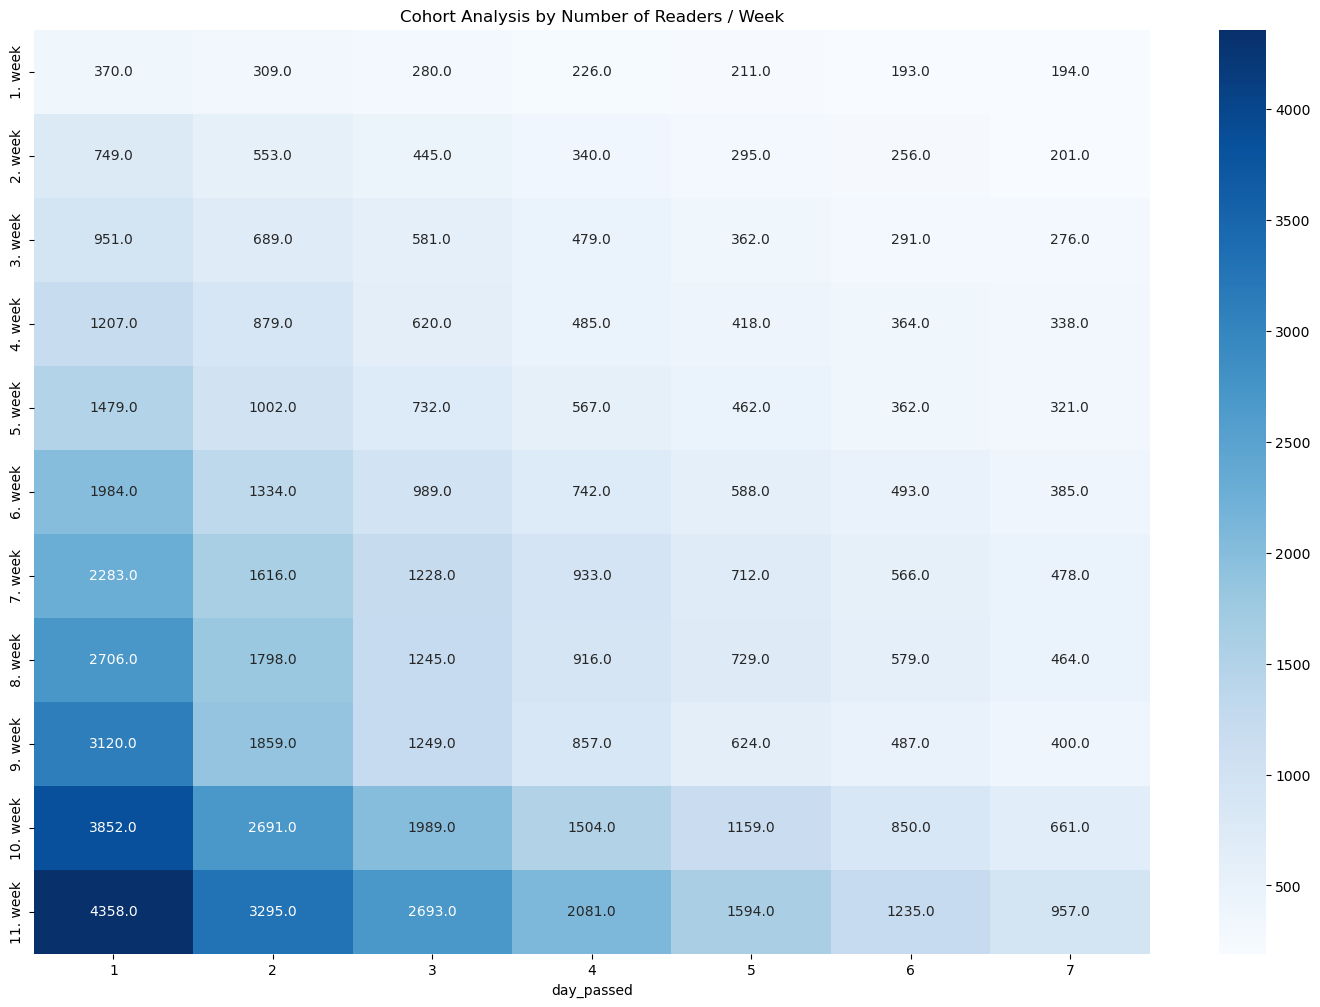

In [44]:
plt.figure(figsize=(18,12))
plt.title('Cohort Analysis by Number of Readers / Week')
sns.heatmap(df, annot=True, cmap='Blues', fmt=".1f")

In [45]:
returning_source = returning_read.merge(first_read, how='left', on='user_id')[['date_time_x', 'user_id', 'country_x', 'topic_x', 'source']]
returning_source['date'] = returning_source['date_time_x'].str.split(' ').str[0]
returning_source = returning_source[['date', 'user_id', 'country_x', 'topic_x', 'source']]
returning_source = returning_source.rename(columns = {'country_x': 'country', 'topic_x': 'topic'})
returning_source

,date,user_id,country,topic,source
0,2018-01-01,2458151287,country_5,North America,SEO
1,2018-01-01,2458151279,country_4,Asia,SEO
2,2018-01-01,2458151525,country_4,Africa,Reddit
3,2018-01-01,2458151287,country_5,Asia,SEO
4,2018-01-01,2458151315,country_5,South America,SEO
...,...,...,...,...,...
371849,2018-03-31,2458361163,country_4,Africa,Reddit
371850,2018-03-31,2458361177,country_6,Asia,AdWords
371851,2018-03-31,2458361244,country_7,North America,Reddit
371852,2018-03-31,2458361267,country_7,Europe,Reddit


In [46]:
first_source = first_read[['date_time', 'user_id', 'country', 'topic', 'source']]
first_source['date'] = first_source['date_time'].str.split(' ').str[0]
first_source = first_source[['date', 'user_id', 'country', 'topic', 'source']]
first_source

C:\Users\gelias006\AppData\Local\Temp\ipykernel_3300\679077810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_source['date'] = first_source['date_time'].str.split(' ').str[0]


,date,user_id,country,topic,source
0,2018-01-01,2458151261,country_7,North America,SEO
1,2018-01-01,2458151262,country_7,South America,SEO
2,2018-01-01,2458151263,country_7,Africa,AdWords
3,2018-01-01,2458151264,country_7,Europe,AdWords
4,2018-01-01,2458151265,country_8,North America,Reddit
...,...,...,...,...,...
210018,2018-03-30,2458361279,country_1,North America,SEO
210019,2018-03-30,2458361280,country_6,Asia,AdWords
210020,2018-03-30,2458361281,country_8,Europe,AdWords
210021,2018-03-30,2458361282,country_5,Europe,AdWords


In [47]:
frames2 = [first_source, returning_source]
concat_read_source = pd.concat(frames2)

# Regression

In [49]:
#in the last days, there is a chance that the data is wrong
#so the income is zero all the time
#so I don't use these days for regression
reg = revenue_per_day.iloc[0:84]

In [50]:
x = reg.index
y = reg.price

In [51]:
coefs = np.polyfit(x, y, 1)
predict = np.poly1d(coefs)

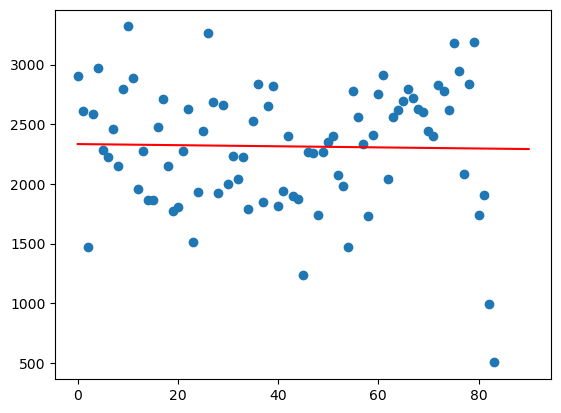

In [52]:
x_test = np.linspace(0, 90)
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.show()

In [53]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))
#the model is very inaccurate, it could not be used for forecasting
#I think it is because there isn't any pattern in the data

0.00048780193392572446

In [54]:
reg2 = concat_read_source.groupby('date').count()[['user_id']].reset_index()
#the last day's data is probably wrong here as well
reg2 = reg2.iloc[:-1]

In [55]:
x = reg2.index
y = reg2.user_id
coefs = np.polyfit(x, y, 1)
predict = np.poly1d(coefs)

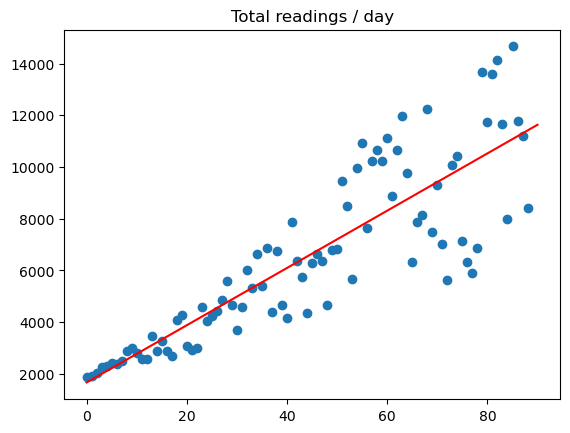

In [56]:
x_test = np.linspace(0, 90)
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.title('Total readings / day')
plt.show()

In [57]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.7349497868732906

In [58]:
reg3 = subscribe_per_day.iloc[:83]
x = reg3.index
y = reg3['subscriber/day']
coefs = np.polyfit(x, y, 3)
predict = np.poly1d(coefs)

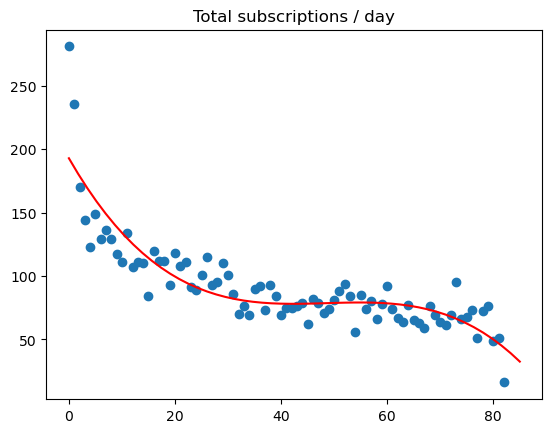

In [59]:
x_test = np.linspace(0,85)
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.title('Total subscriptions / day')
plt.plot(x_test, y_pred, c = 'r')
plt.show()

In [60]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.7674941166955211

# Cohort by countries

In [61]:
cohort_countries = concat_read_source[['date', 'country', 'user_id']]

In [62]:
cohort_countries['date'] = pd.to_datetime(cohort_countries['date'])

C:\Users\gelias006\AppData\Local\Temp\ipykernel_3300\4265656747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_countries['date'] = pd.to_datetime(cohort_countries['date'])


In [63]:
cohort_countries['first_visit'] = cohort_countries.groupby('user_id')['date'].transform('min')

C:\Users\gelias006\AppData\Local\Temp\ipykernel_3300\3752681476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_countries['first_visit'] = cohort_countries.groupby('user_id')['date'].transform('min')


In [64]:
cohort_countries['days_since_first_visit'] = (cohort_countries['date'] - cohort_countries['first_visit']).dt.days
cohort_countries

,date,country,user_id,first_visit,days_since_first_visit
0,2018-01-01,country_7,2458151261,2018-01-01,0
1,2018-01-01,country_7,2458151262,2018-01-01,0
2,2018-01-01,country_7,2458151263,2018-01-01,0
3,2018-01-01,country_7,2458151264,2018-01-01,0
4,2018-01-01,country_8,2458151265,2018-01-01,0
...,...,...,...,...,...
371849,2018-03-31,country_4,2458361163,2018-03-30,1
371850,2018-03-31,country_6,2458361177,2018-03-30,1
371851,2018-03-31,country_7,2458361244,2018-03-30,1
371852,2018-03-31,country_7,2458361267,2018-03-30,1


In [65]:
cohort_data = cohort_countries.groupby(['country', 'days_since_first_visit'])['user_id'].nunique().reset_index()
cohort_counts = cohort_data.pivot(index='country', columns='days_since_first_visit', values='user_id')
cohort_counts = cohort_counts.iloc[:, 1:17]
cohort_counts

days_since_first_visit,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
country,,,,,,,,,,,,,,,,
country_1,63.0,45.0,35.0,31.0,25.0,23.0,20.0,12.0,13.0,10.0,7.0,6.0,7.0,9.0,9.0,8.0
country_2,5833.0,3929.0,2864.0,2137.0,1659.0,1300.0,1095.0,921.0,784.0,660.0,632.0,589.0,571.0,564.0,514.0,480.0
country_3,403.0,280.0,207.0,161.0,143.0,110.0,99.0,78.0,64.0,62.0,54.0,48.0,40.0,41.0,43.0,47.0
country_4,6507.0,4281.0,2996.0,2112.0,1464.0,1087.0,805.0,613.0,482.0,381.0,310.0,256.0,193.0,189.0,166.0,167.0
country_5,9637.0,6405.0,4597.0,3334.0,2528.0,1927.0,1499.0,1258.0,1014.0,835.0,768.0,725.0,652.0,570.0,587.0,561.0
country_6,2126.0,1445.0,1050.0,808.0,630.0,493.0,421.0,346.0,319.0,301.0,284.0,259.0,256.0,252.0,224.0,214.0
country_7,5955.0,3949.0,2901.0,2183.0,1674.0,1313.0,1100.0,901.0,843.0,766.0,695.0,664.0,624.0,599.0,579.0,555.0
country_8,259.0,191.0,145.0,108.0,86.0,75.0,51.0,46.0,48.0,42.0,37.0,31.0,35.0,32.0,27.0,21.0


[]

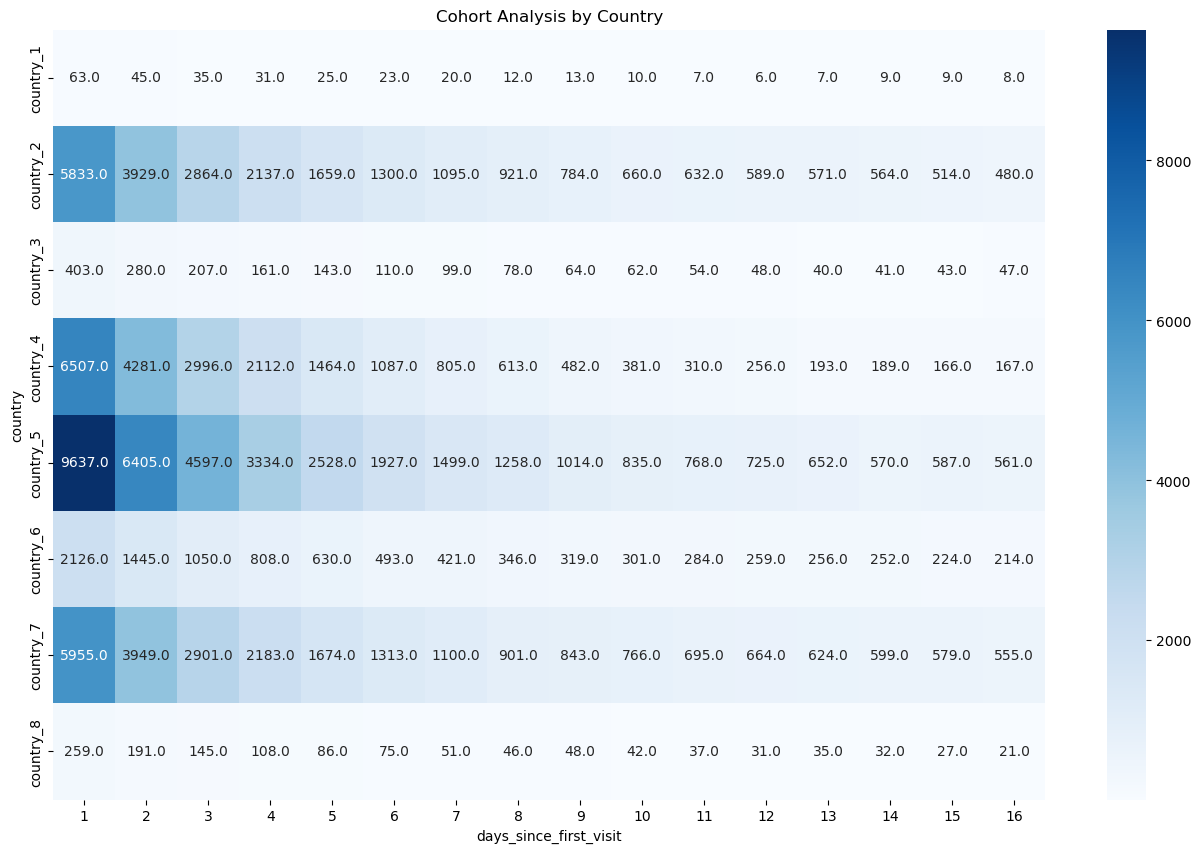

In [66]:
plt.figure(figsize=(16,10))
plt.title('Cohort Analysis by Country')
sns.heatmap(cohort_counts, annot=True, cmap='Blues', fmt=".1f")
plt.plot()

# Cohort by source

In [67]:
cohort_sources = concat_read_source[['date', 'source', 'user_id']]

In [68]:
cohort_sources['date'] = pd.to_datetime(cohort_sources['date'])

C:\Users\gelias006\AppData\Local\Temp\ipykernel_3300\3464578723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_sources['date'] = pd.to_datetime(cohort_sources['date'])


In [69]:
cohort_sources['first_visit'] = cohort_sources.groupby('user_id')['date'].transform('min')

C:\Users\gelias006\AppData\Local\Temp\ipykernel_3300\1589685165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_sources['first_visit'] = cohort_sources.groupby('user_id')['date'].transform('min')


In [70]:
cohort_sources['days_since_first_visit'] = (cohort_sources['date'] - cohort_sources['first_visit']).dt.days
cohort_sources

,date,source,user_id,first_visit,days_since_first_visit
0,2018-01-01,SEO,2458151261,2018-01-01,0
1,2018-01-01,SEO,2458151262,2018-01-01,0
2,2018-01-01,AdWords,2458151263,2018-01-01,0
3,2018-01-01,AdWords,2458151264,2018-01-01,0
4,2018-01-01,Reddit,2458151265,2018-01-01,0
...,...,...,...,...,...
371849,2018-03-31,Reddit,2458361163,2018-03-30,1
371850,2018-03-31,AdWords,2458361177,2018-03-30,1
371851,2018-03-31,Reddit,2458361244,2018-03-30,1
371852,2018-03-31,Reddit,2458361267,2018-03-30,1


In [71]:
cohort_data2 = cohort_sources.groupby(['source', 'days_since_first_visit'])['user_id'].nunique().reset_index()
cohort_counts2 = cohort_data2.pivot(index='source', columns='days_since_first_visit', values='user_id')
cohort_counts2 = cohort_counts2.iloc[:, 1:17]
cohort_counts2

days_since_first_visit,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
source,,,,,,,,,,,,,,,,
AdWords,4256.0,2820.0,2018.0,1538.0,1149.0,912.0,779.0,641.0,579.0,516.0,485.0,429.0,406.0,393.0,389.0,374.0
Reddit,13699.0,9106.0,6649.0,4884.0,3741.0,2924.0,2336.0,1937.0,1669.0,1442.0,1326.0,1268.0,1176.0,1143.0,1081.0,1026.0
SEO,12828.0,8599.0,6128.0,4452.0,3319.0,2492.0,1975.0,1597.0,1319.0,1099.0,976.0,881.0,796.0,720.0,679.0,653.0


[]

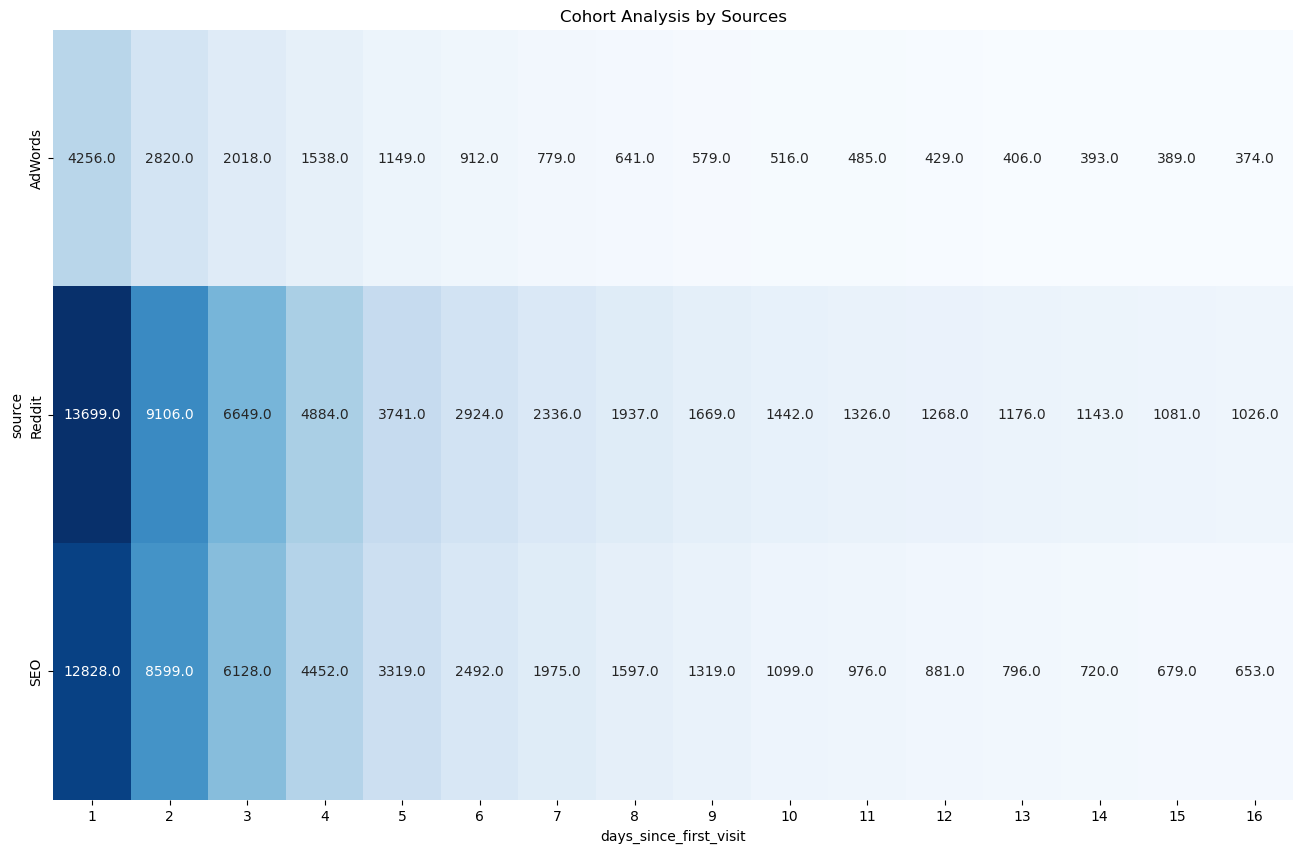

In [72]:
plt.figure(figsize=(16,10))
plt.title('Cohort Analysis by Sources')
sns.heatmap(cohort_counts2, annot=True, cmap='Blues', fmt=".1f", cbar=False)
plt.plot()

# Cohort by topic

In [73]:
cohort_topics = concat_read_source[['date', 'topic', 'user_id']]
cohort_topics['date'] = pd.to_datetime(cohort_topics['date'])
cohort_topics['first_visit'] = cohort_topics.groupby('user_id')['date'].transform('min')
cohort_topics['days_since_first_visit'] = (cohort_topics['date'] - cohort_topics['first_visit']).dt.days
cohort_topics

C:\Users\gelias006\AppData\Local\Temp\ipykernel_3300\4034026261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_topics['date'] = pd.to_datetime(cohort_topics['date'])
C:\Users\gelias006\AppData\Local\Temp\ipykernel_3300\4034026261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_topics['first_visit'] = cohort_topics.groupby('user_id')['date'].transform('min')


,date,topic,user_id,first_visit,days_since_first_visit
0,2018-01-01,North America,2458151261,2018-01-01,0
1,2018-01-01,South America,2458151262,2018-01-01,0
2,2018-01-01,Africa,2458151263,2018-01-01,0
3,2018-01-01,Europe,2458151264,2018-01-01,0
4,2018-01-01,North America,2458151265,2018-01-01,0
...,...,...,...,...,...
371849,2018-03-31,Africa,2458361163,2018-03-30,1
371850,2018-03-31,Asia,2458361177,2018-03-30,1
371851,2018-03-31,North America,2458361244,2018-03-30,1
371852,2018-03-31,Europe,2458361267,2018-03-30,1


In [74]:
cohort_data3 = cohort_topics.groupby(['topic', 'days_since_first_visit'])['user_id'].nunique().reset_index()
cohort_counts3 = cohort_data3.pivot(index='topic', columns='days_since_first_visit', values='user_id')
cohort_counts3 = cohort_counts3.iloc[:, 1:17]
cohort_counts3

days_since_first_visit,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
topic,,,,,,,,,,,,,,,,
Africa,4115.0,2434.0,1860.0,1222.0,1020.0,791.0,682.0,461.0,367.0,335.0,323.0,333.0,254.0,285.0,253.0,219.0
Asia,14393.0,8978.0,6562.0,4797.0,3549.0,2824.0,2242.0,1856.0,1508.0,1265.0,1184.0,1110.0,1128.0,993.0,1009.0,906.0
Australia,4066.0,2441.0,1740.0,1216.0,971.0,752.0,594.0,518.0,464.0,339.0,320.0,330.0,231.0,233.0,228.0,214.0
Europe,7712.0,4609.0,3126.0,2345.0,1764.0,1365.0,1097.0,920.0,800.0,697.0,644.0,584.0,473.0,466.0,471.0,390.0
North America,12880.0,8003.0,5683.0,4205.0,3017.0,2268.0,1807.0,1465.0,1265.0,1050.0,901.0,820.0,781.0,716.0,666.0,708.0
South America,7822.0,4551.0,3432.0,2440.0,1790.0,1380.0,1068.0,882.0,764.0,698.0,552.0,532.0,500.0,428.0,460.0,435.0


[]

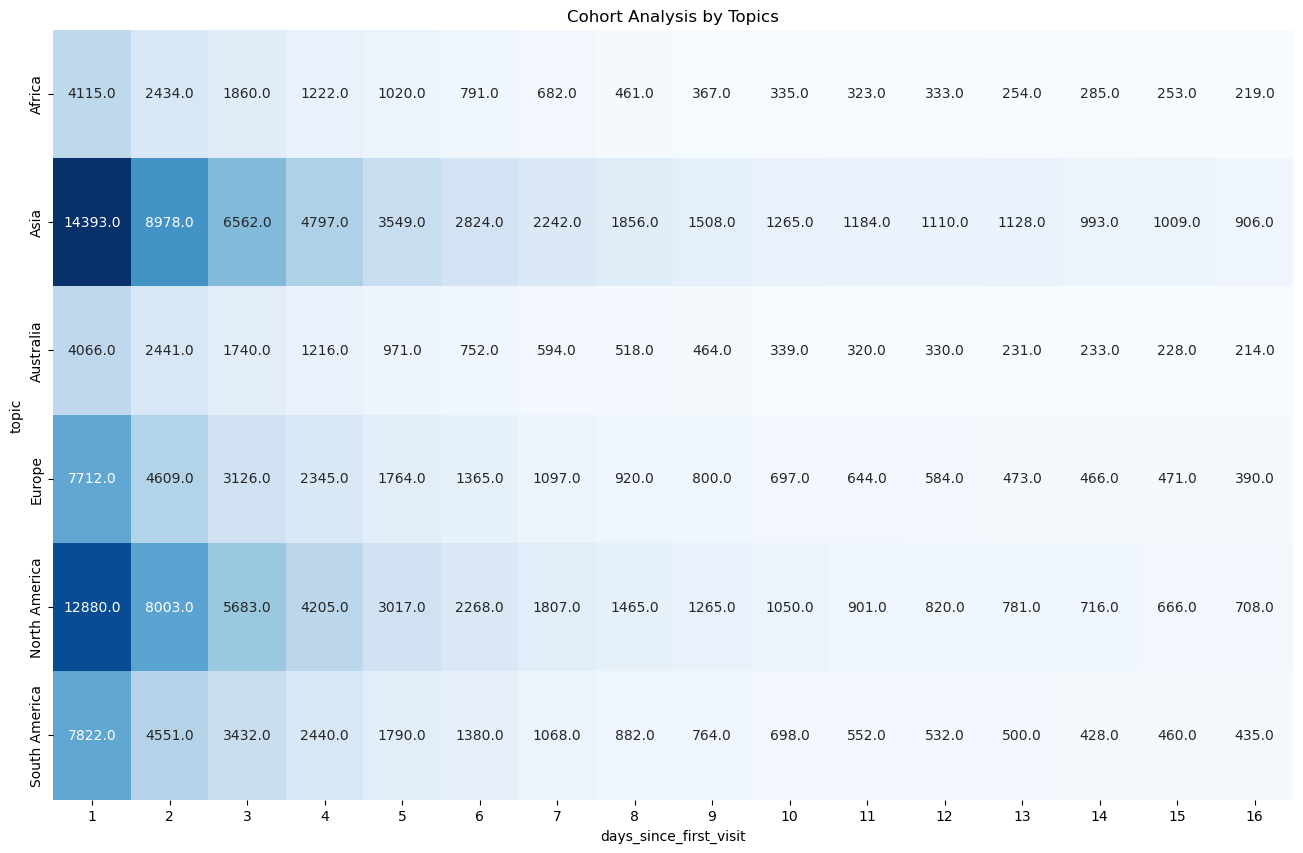

In [75]:
plt.figure(figsize=(16,10))
plt.title('Cohort Analysis by Topics')
sns.heatmap(cohort_counts3, annot=True, cmap='Blues', fmt=".1f", cbar=False)
plt.plot()

# Group by Countries

In [95]:
readers_per_country = concat_read.groupby('country').count()[['user_id']]
readers_per_country = readers_per_country.rename(columns = {'user_id': 'readers'})
readers_per_country = readers_per_country.reset_index()
readers_per_country

,country,readers
0,country_1,6231
1,country_2,130076
2,country_3,9128
3,country_4,71258
4,country_5,149732
5,country_6,63752
6,country_7,132067
7,country_8,19633


In [98]:
revenue_per_country = merged_buy[~merged_buy['price'].isna()].groupby('country').sum()[['price']]
revenue_per_country = revenue_per_country.rename(columns = {'price': 'revenue'})
revenue_per_country = revenue_per_country.reset_index()
revenue_per_country

,country,revenue
0,country_1,920.0
1,country_2,39528.0
2,country_3,3616.0
3,country_4,33464.0
4,country_5,57920.0
5,country_6,16432.0
6,country_7,39760.0
7,country_8,2840.0


In [100]:
countries_df = pd.DataFrame().assign(country=readers_per_country['country'], readers=readers_per_country['readers'], revenue=revenue_per_country['revenue'])
countries_df['revenue/reader'] = countries_df['revenue'] / countries_df['readers']
countries_df

,country,readers,revenue,revenue/reader
0,country_1,6231,920.0,0.147649
1,country_2,130076,39528.0,0.303884
2,country_3,9128,3616.0,0.396144
3,country_4,71258,33464.0,0.469617
4,country_5,149732,57920.0,0.386824
5,country_6,63752,16432.0,0.257749
6,country_7,132067,39760.0,0.301059
7,country_8,19633,2840.0,0.144654


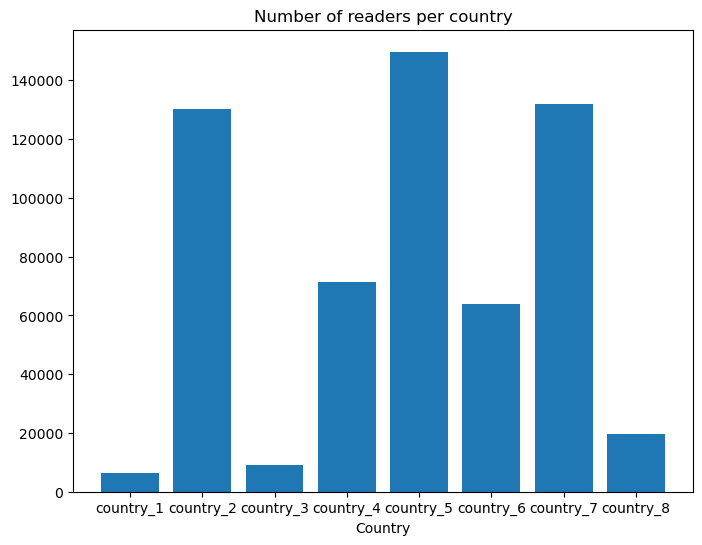

In [113]:
plt.figure(figsize=(8,6))
plt.bar(countries_df['country'], countries_df['readers'])
plt.title('Number of readers per country')
plt.xlabel('Country')
plt.show()

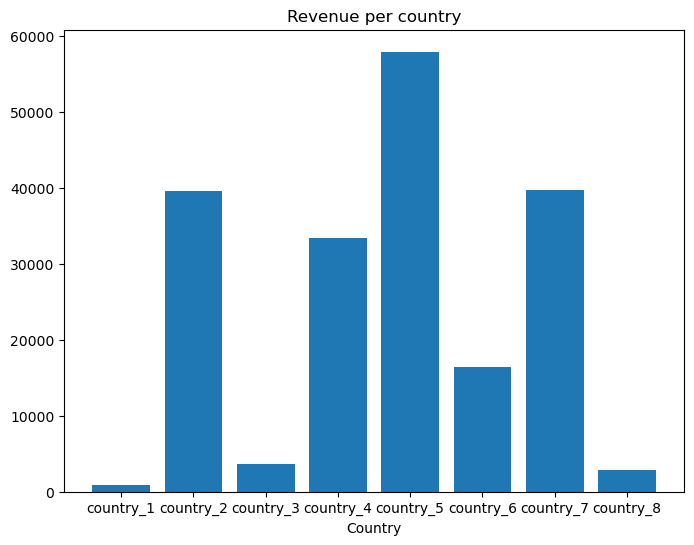

In [112]:
plt.figure(figsize=(8,6))
plt.bar(countries_df['country'], countries_df['revenue'])
plt.title('Revenue per country')
plt.xlabel('Country')
plt.show()

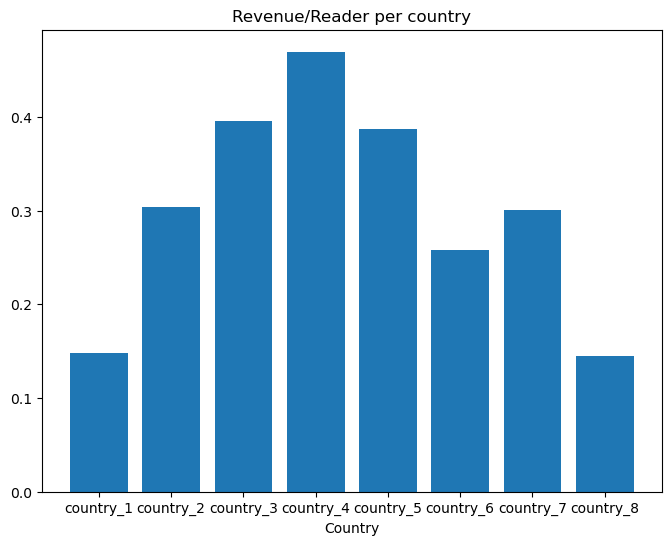

In [114]:
plt.figure(figsize=(8,6))
plt.bar(countries_df['country'], countries_df['revenue/reader'])
plt.title('Revenue/Reader per country')
plt.xlabel('Country')
plt.show()